## Data download and split

In [1]:
from credit_risk_analysis import dataset

dataset.main()

2025-06-26 23:37:14.852 | INFO     | credit_risk_analysis.config:<module>:11 - PROJ_ROOT path is: C:\Users\andre\iCloudDrive\Documents_Backup\Digital_Bullet_Journal\Education\Data Science\Anyone AI\5. Final_Project\credit_risk_analysis


2025-06-26 23:37:17.256 | INFO     | credit_risk_analysis.dataset:main:71 - Downloading dataset from S3...
Download complete.
Download complete.
Download complete.
Download complete.
Download complete.
Download complete.
Download complete.
Download complete.
Number of variables: 53
X_train: (40000, 53)
X_val: (10000, 53)
y_train: (40000,)
y_val: (10000,)
Datos guardados en data/interim/
2025-06-26 23:37:28.716 | SUCCESS  | credit_risk_analysis.dataset:main:116 - Dataset downloaded successfully.


## Exploratory Data Analysis - EDA

In [ ]:
#!pip install -q openpyxl
#!pip install -q xlrd


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import pandas as pd
from tqdm import tqdm
from collections import Counter
from credit_risk_analysis.config import RAW_DATA_DIR

In [6]:
variables = pd.read_excel("data/raw/PAKDD2010_VariablesList.xls")
colnames = variables['Var_Title'].values.tolist()
print("Number of variables:", len(set(colnames)))

Number of variables: 53


In [7]:
# Setting list of column names
counts = {k:v for k,v in Counter(colnames).items() if v > 1}
newlist = colnames[:]

for i in reversed(range(len(colnames))):
    item = colnames[i]
    if item in counts and counts[item]:
        newlist[i] += str(counts[item])
        counts[item]-=1

In [8]:
train_df = pd.read_csv(
    os.path.join(RAW_DATA_DIR, 'PAKDD-2010 training data.zip'),
    compression='zip', sep='\t', encoding='latin1', 
    header=None, names=newlist,
    low_memory=False
    )

validation_df = pd.read_csv(
    os.path.join(RAW_DATA_DIR, 'LeaderBoard_Data.zip'),
    compression='zip', sep='\t', encoding='latin1', 
    header=None, names=newlist,
    low_memory=False
    )

testing_df = pd.read_csv(
    os.path.join(RAW_DATA_DIR, 'PAKDD2010_Prediction_Data.txt'),
    sep='\t', encoding='latin1', 
    header=None, names=newlist,
    low_memory=False
)

print("Training set shape:", train_df.shape)
print("Validation set shape:", validation_df.shape)
print("Testing set shape:", testing_df.shape)

Training set shape: (50000, 54)
Validation set shape: (20000, 54)
Testing set shape: (20000, 54)


In [35]:
pd.set_option('display.max_columns', 500)

In [36]:
train_df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL1,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL2,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [7]:
train_df.dtypes.value_counts()

int64      25
object     20
float64     9
Name: count, dtype: int64

In [8]:
train_df.select_dtypes(include=['object'])

,CLERK_TYPE,APPLICATION_SUBMISSION_TYPE,SEX,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,FLAG_MOBILE_PHONE,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,FLAG_ACSP_RECORD,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3
0,C,Web,F,RN,Assu,RN,Santana do Matos,Centro,Y,105,N,N,,NaN,NaN,N,,N,595,595
1,C,Carga,F,RJ,rio de janeiro,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,N,Y,,NaN,NaN,N,,N,230,230
2,C,Web,F,RN,GARANHUNS,RN,Parnamirim,Boa Esperanca,Y,105,N,N,,NaN,NaN,N,,N,591,591
3,C,Web,F,PE,CABO,PE,CABO,PONTE DOS CARVALHOS,N,,N,N,,NaN,NaN,N,,N,545,545
4,C,Web,M,RJ,RIO DE JANEIRO,RJ,Rio de Janeiro,Santa Cruz,Y,20,N,N,,NaN,NaN,N,,N,235,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C,0,F,RN,NATAL,RN,NATAL,PAJUCARA,Y,105,N,N,,NaN,NaN,N,,N,591,591
49996,C,0,F,SP,LENCOIS PAULISTA,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,N,N,,NaN,NaN,N,,N,186,186
49997,C,Web,M,PR,RIO BONITO,SP,GUARULHOS,jardim vida nova,Y,5,N,Y,SP,GUARULHOS,ITAPEGICA,Y,5,N,715,715
49998,C,Web,F,SP,SAO PAULO,MG,CONTAGEM,VILA BELEM,Y,29,N,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,N,320,320


In [9]:
desc = train_df.select_dtypes(include=['object']).describe()

In [10]:
location_cols = ['RESIDENCIAL_BOROUGH',
                 'CITY_OF_BIRTH',
                 'PROFESSIONAL_BOROUGH',
                 'RESIDENCIAL_CITY',
                 'PROFESSIONAL_CITY',
                 'STATE_OF_BIRTH',
                 'PROFESSIONAL_STATE',
                 'RESIDENCIAL_STATE']

for location in tqdm(location_cols):
    train_df[location] = train_df[location].str.strip().str.upper()
    

100%|██████████| 8/8 [00:00<00:00, 44.11it/s]


In [16]:
#!pip install ipywidgets

In [11]:
desc.loc['unique'].sort_values(ascending=False)

RESIDENCIAL_BOROUGH             14511
CITY_OF_BIRTH                    9910
PROFESSIONAL_BOROUGH             5057
RESIDENCIAL_CITY                 3529
PROFESSIONAL_CITY                2236
PROFESSIONAL_ZIP_3                794
RESIDENCIAL_ZIP_3                 794
RESIDENCIAL_PHONE_AREA_CODE       102
PROFESSIONAL_PHONE_AREA_CODE       87
STATE_OF_BIRTH                     29
PROFESSIONAL_STATE                 28
RESIDENCIAL_STATE                  27
SEX                                 4
APPLICATION_SUBMISSION_TYPE         3
COMPANY                             2
FLAG_PROFESSIONAL_PHONE             2
FLAG_RESIDENCIAL_PHONE              2
CLERK_TYPE                          1
FLAG_ACSP_RECORD                    1
FLAG_MOBILE_PHONE                   1
Name: unique, dtype: object

<Axes: title={'center': 'Unique values per column'}>

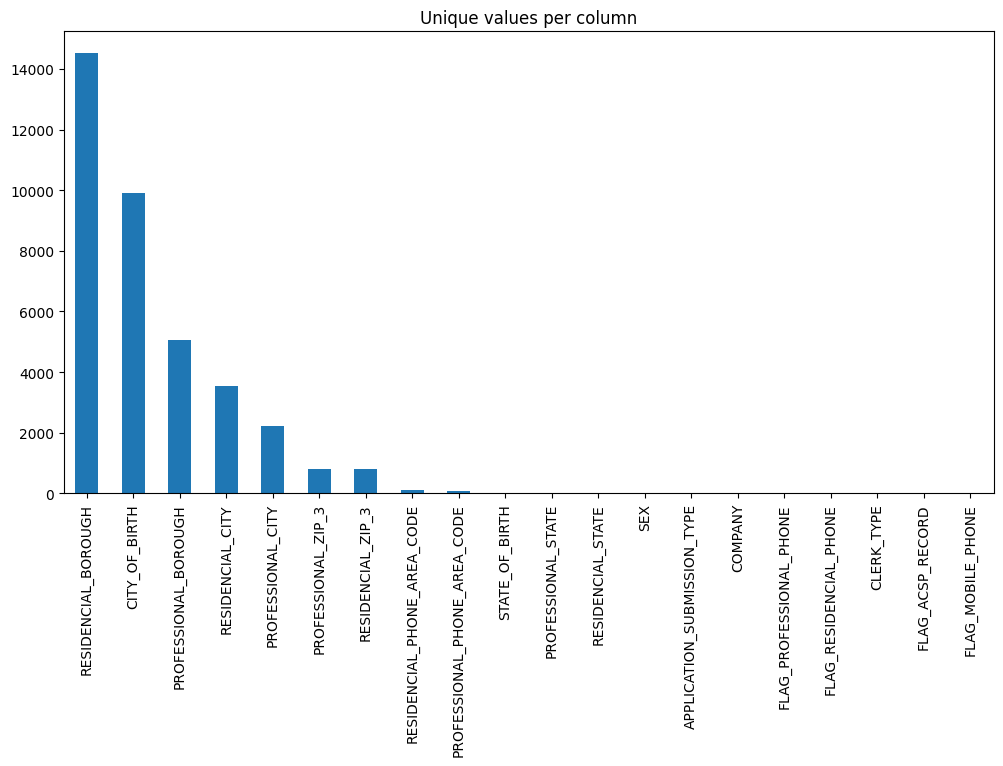

In [34]:
desc.loc['unique'].sort_values(ascending=False).plot.bar(figsize=(12, 6), title='Unique values per column')

In [12]:
def topk_label_encoding(df, column, k=10):
    top_k = df[column].value_counts().nlargest(k).index
    df[f"{column}_topk"] = df[column].apply(lambda x: x if x in top_k else "Other")
    df[f"{column}_topk"] = df[f"{column}_topk"].astype("category").cat.codes
    return df

In [54]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
for col in tqdm(categorical_cols):
    train_df = topk_label_encoding(train_df, col)


  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:01<00:00, 10.92it/s]


In [58]:
train_df['PROFESSIONAL_BOROUGH'].isnull().sum() / 50000

np.float64(0.67566)

In [55]:
processed_cols = train_df.columns[train_df.columns.str.endswith('_topk')].tolist()
train_df[processed_cols]

,CLERK_TYPE_topk,APPLICATION_SUBMISSION_TYPE_topk,SEX_topk,STATE_OF_BIRTH_topk,CITY_OF_BIRTH_topk,RESIDENCIAL_STATE_topk,RESIDENCIAL_CITY_topk,RESIDENCIAL_BOROUGH_topk,FLAG_RESIDENCIAL_PHONE_topk,RESIDENCIAL_PHONE_AREA_CODE_topk,FLAG_MOBILE_PHONE_topk,COMPANY_topk,PROFESSIONAL_STATE_topk,PROFESSIONAL_CITY_topk,PROFESSIONAL_BOROUGH_topk,FLAG_PROFESSIONAL_PHONE_topk,PROFESSIONAL_PHONE_AREA_CODE_topk,FLAG_ACSP_RECORD_topk,RESIDENCIAL_ZIP_3_topk,PROFESSIONAL_ZIP_3_topk
0,0,2,1,8,3,8,5,4,1,2,0,0,0,3,7,0,0,0,10,10
1,0,1,1,7,3,7,8,7,1,4,0,1,0,3,7,0,0,0,10,10
2,0,2,1,8,3,8,5,7,1,2,0,0,0,3,7,0,0,0,3,3
3,0,2,1,5,3,6,5,7,0,0,0,0,0,3,7,0,0,0,10,10
4,0,2,2,7,8,7,5,7,1,4,0,0,0,3,7,0,0,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,1,8,2,8,5,7,1,2,0,0,0,3,7,0,0,0,3,3
49996,0,0,1,10,3,10,5,7,1,10,0,0,0,3,7,0,0,0,10,10
49997,0,2,2,6,3,10,5,7,1,5,0,1,10,3,7,1,4,0,10,10
49998,0,2,1,10,10,3,5,7,1,10,0,1,3,3,7,1,3,0,10,10


In [73]:
#a = topk_label_encoding(train_df.select_dtypes(include=['object']), 'RESIDENCIAL_CITY', k=10)
a['APPLICATION_SUBMISSION_TYPE'].value_counts()

APPLICATION_SUBMISSION_TYPE
Web      28206
0        19461
Carga     2333
Name: count, dtype: int64

In [63]:
a[['RESIDENCIAL_CITY', 'RESIDENCIAL_CITY_topk']]

,RESIDENCIAL_CITY,RESIDENCIAL_CITY_topk
0,Santana do Matos,5
1,RIO DE JANEIRO,8
2,Parnamirim,5
3,CABO,5
4,Rio de Janeiro,5
...,...,...
49995,NATAL,5
49996,Lencois Paulista,5
49997,GUARULHOS,5
49998,CONTAGEM,5


In [58]:
train_df['RESIDENCIAL_CITY'].str.upper().value_counts()

RESIDENCIAL_CITY
FORTALEZA                 1671
SAO PAULO                 1432
PELOTAS                   1174
RECIFE                     919
NATAL                      879
                          ... 
SAO FRANCISCO DE SALES       1
ARACI                        1
PERTROLINA                   1
COSMOPOLIS                   1
OURO PRETO                   1
Name: count, Length: 2483, dtype: int64

In [46]:
train_df['RESIDENCIAL_PHONE_AREA_CODE'].value_counts().head(20)

RESIDENCIAL_PHONE_AREA_CODE
       8212
5      4558
97     2865
107    2830
54     2297
105    1627
58     1457
84     1421
20     1318
100    1231
81     1164
103    1078
66     1033
29     1020
117     950
112     921
32      849
71      843
86      798
67      668
Name: count, dtype: int64

In [50]:
train_df['PROFESSIONAL_PHONE_AREA_CODE'].value_counts().head(20)

PROFESSIONAL_PHONE_AREA_CODE
       36532
5       1457
54      1109
107      981
97       644
58       486
29       465
105      441
66       413
81       411
103      346
84       339
32       338
20       335
75       317
100      293
71       277
117      269
40       260
86       255
Name: count, dtype: int64

In [53]:
train_df['PROFESSIONAL_ZIP_3'].value_counts()#.head(20)

PROFESSIONAL_ZIP_3
960        1085
591         839
570         763
628         671
456         664
           ... 
953           1
504           1
418           1
307           1
#DIV/0!       1
Name: count, Length: 794, dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

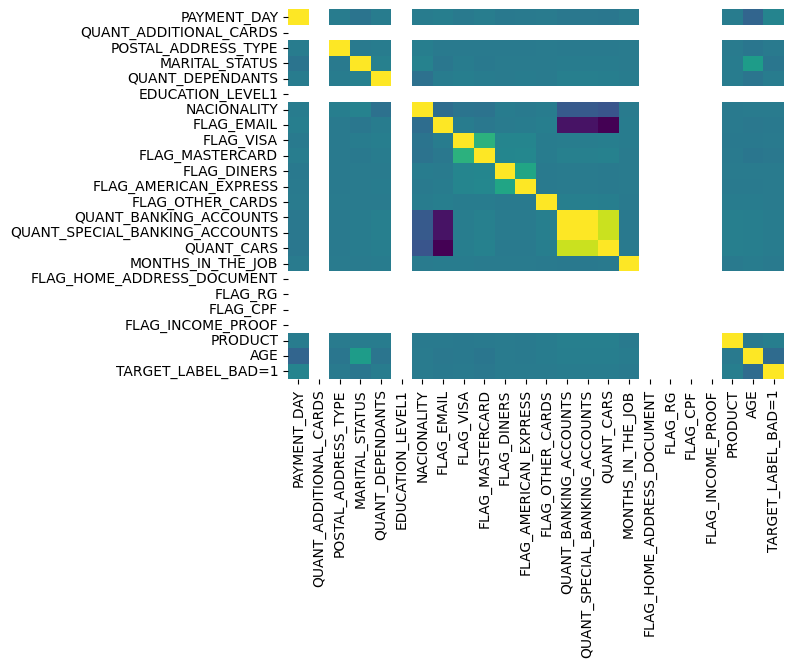

In [27]:
sns.heatmap(train_df.drop(columns='ID_CLIENT').select_dtypes(include=['int64']).corr(), cbar=False, cmap='viridis')

In [31]:
train_df.drop(columns='ID_CLIENT').select_dtypes(include=['int64']).corr(method='pearson')

,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL1,NACIONALITY,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,...,QUANT_SPECIAL_BANKING_ACCOUNTS,QUANT_CARS,MONTHS_IN_THE_JOB,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD=1
PAYMENT_DAY,1.000000,NaN,0.011134,-0.042197,0.007054,NaN,0.007192,0.019423,-0.004012,0.013091,...,-0.016418,-0.022499,0.003107,NaN,NaN,NaN,NaN,0.006373,-0.153042,0.070633
QUANT_ADDITIONAL_CARDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POSTAL_ADDRESS_TYPE,0.011134,NaN,1.000000,-0.003475,0.012115,NaN,0.019099,-0.004576,-0.001925,-0.002401,...,-0.004143,-0.001533,0.000616,NaN,NaN,NaN,NaN,0.002974,-0.030579,-0.002423
MARITAL_STATUS,-0.042197,NaN,-0.003475,1.000000,0.037646,NaN,0.049219,-0.022849,0.007645,-0.012956,...,0.006515,0.011005,0.004016,NaN,NaN,NaN,NaN,0.010545,0.237030,-0.030380
QUANT_DEPENDANTS,0.007054,NaN,0.012115,0.037646,1.000000,NaN,-0.072128,0.006691,0.024137,0.009605,...,0.028553,0.025209,0.007597,NaN,NaN,NaN,NaN,0.009623,-0.037415,0.012157
EDUCATION_LEVEL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NACIONALITY,0.007192,NaN,0.019099,0.049219,-0.072128,NaN,1.000000,-0.096312,-0.045611,-0.049008,...,-0.219992,-0.247115,0.004618,NaN,NaN,NaN,NaN,-0.006574,0.001579,-0.000952
FLAG_EMAIL,0.019423,NaN,-0.004576,-0.022849,0.006691,NaN,-0.096312,1.000000,0.005696,-0.014986,...,-0.616508,-0.697017,0.012066,NaN,NaN,NaN,NaN,-0.004697,-0.018876,-0.008067
FLAG_VISA,-0.004012,NaN,-0.001925,0.007645,0.024137,NaN,-0.045611,0.005696,1.000000,0.385942,...,0.014979,0.022204,0.007636,NaN,NaN,NaN,NaN,-0.011846,-0.009993,-0.005398
FLAG_MASTERCARD,0.013091,NaN,-0.002401,-0.012956,0.009605,NaN,-0.049008,-0.014986,0.385942,1.000000,...,0.036847,0.041397,0.003620,NaN,NaN,NaN,NaN,-0.004878,-0.033113,-0.017658


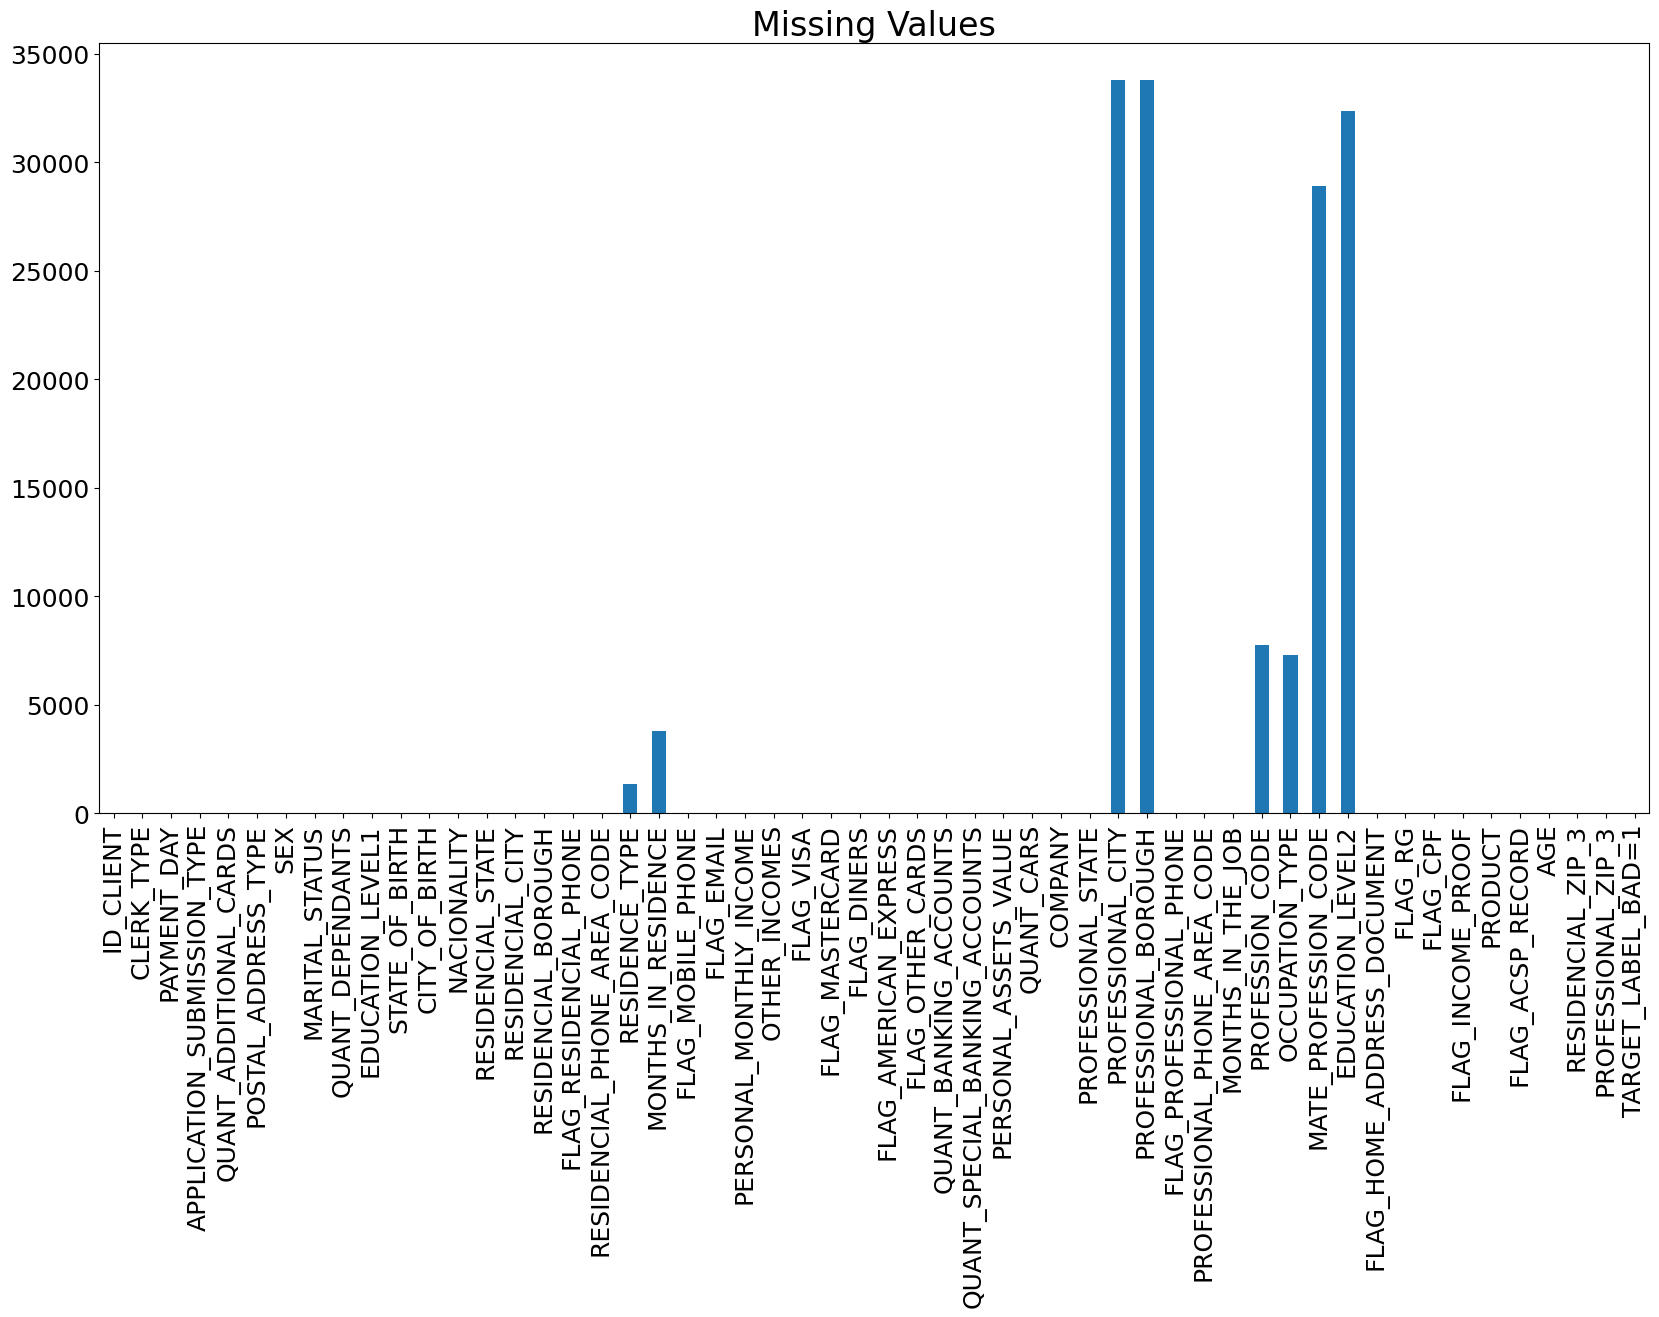

In [ ]:
ax = train_df.isnull().sum().plot.bar(
    figsize=(20, 10),
    legend=False
)
ax.set_title("Missing Values", fontsize=24)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

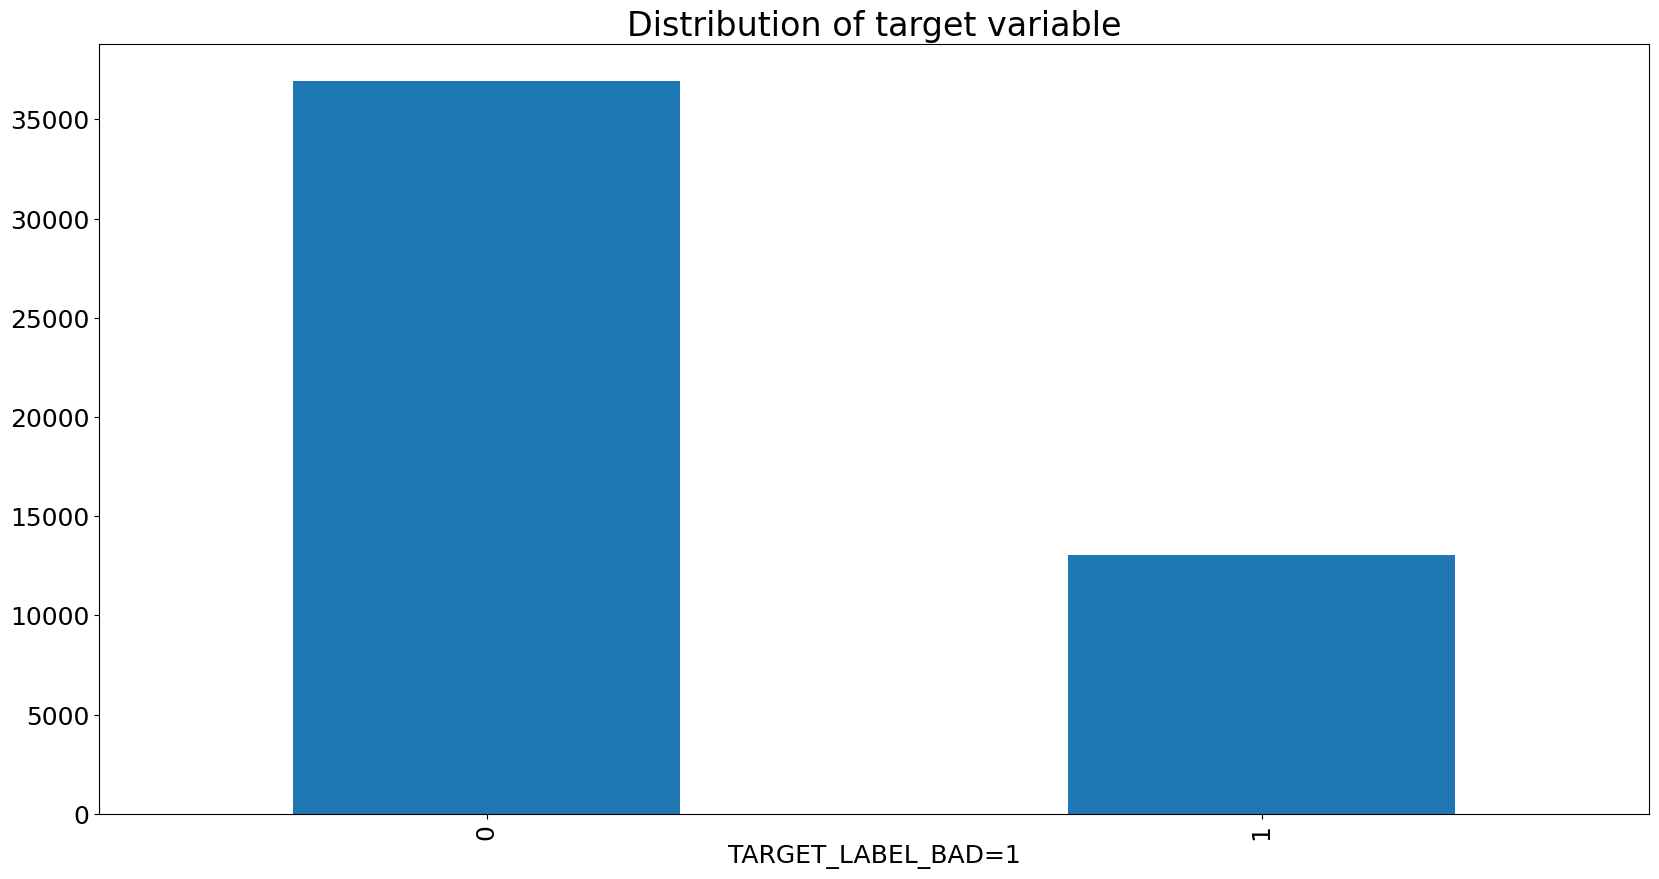

In [33]:
ax = train_df['TARGET_LABEL_BAD=1'].value_counts().plot.bar(
    figsize=(20, 10), 
    legend=False
)
ax.set_title("Distribution of target variable", fontsize=24)
ax.tick_params(axis='x', labelsize=18)
ax.set_xlabel("TARGET_LABEL_BAD=1", fontsize=18)
ax.tick_params(axis='y', labelsize=18)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL1                50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [22]:
train_df.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL1,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,...,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL2,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,...,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,...,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,...,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='AGE', ylabel='Count'>

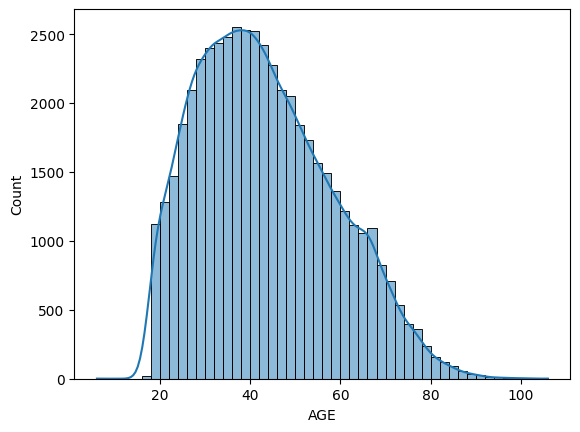

In [27]:
sns.histplot(train_df, x='AGE', kde=True, binwidth=2)

<Axes: xlabel='PERSONAL_MONTHLY_INCOME'>

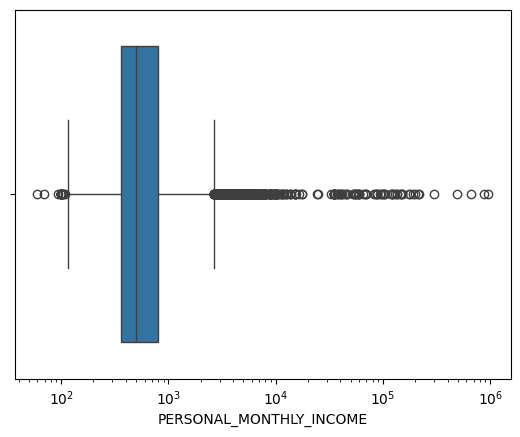

In [38]:
sns.boxplot(train_df, x='PERSONAL_MONTHLY_INCOME', log_scale=True)

In [29]:
variables

,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
5,6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
6,7,SEX,NaN,"M=Male, F=Female"
7,8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
8,9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."
9,10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5"


In [30]:
train_df['PERSONAL_MONTHLY_INCOME'].describe()

count     50000.000000
mean        886.678437
std        7846.959327
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

In [1]:
#!pip install sweetviz

In [2]:
#!pip install ydata_profiling

In [50]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

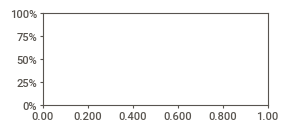

In [48]:
report = sv.analyze(train_df, target_feat='TARGET_LABEL_BAD=1')
report.show_html('data/reports/train_report.html', open_browser=False)

In [40]:
import numpy as np